# Combining Triple Slash Batting Stats with PCA
This notebook uses principal component analysis (PCA) to reduce the typical triple slash statistics into a single batting statistic to compare to the advanced stat wOBA.

In [1]:
%matplotlib notebook
import pandas as pd
from pybaseball import batting_stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA as PCA
import numpy as np

## Pull Stats from Fangraphs

In [2]:
# get all batting stats
all_2019 = batting_stats('2019', qual=1)
all_2019 = all_2019[['Name','G','AB','PA','AVG','OBP','SLG','wOBA']]
all_2019.describe()

,G,AB,PA,AVG,OBP,SLG,wOBA
count,990.000000,990.000000,990.00000,990.000000,990.000000,990.000000,990.000000
mean,61.038384,168.334343,188.40000,0.181799,0.237087,0.289111,0.226777
std,47.979252,192.574880,216.01781,0.135899,0.159690,0.209038,0.149439
min,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.000000,8.00000,0.078500,0.125000,0.083000,0.109000
50%,43.000000,64.000000,70.00000,0.215000,0.282000,0.331500,0.271500
75%,100.000000,309.750000,342.00000,0.261000,0.331000,0.438000,0.326000
max,162.000000,681.000000,747.00000,1.000000,1.000000,1.333000,0.870000


## Show Distribution of Stats

<IPython.core.display.Javascript object>


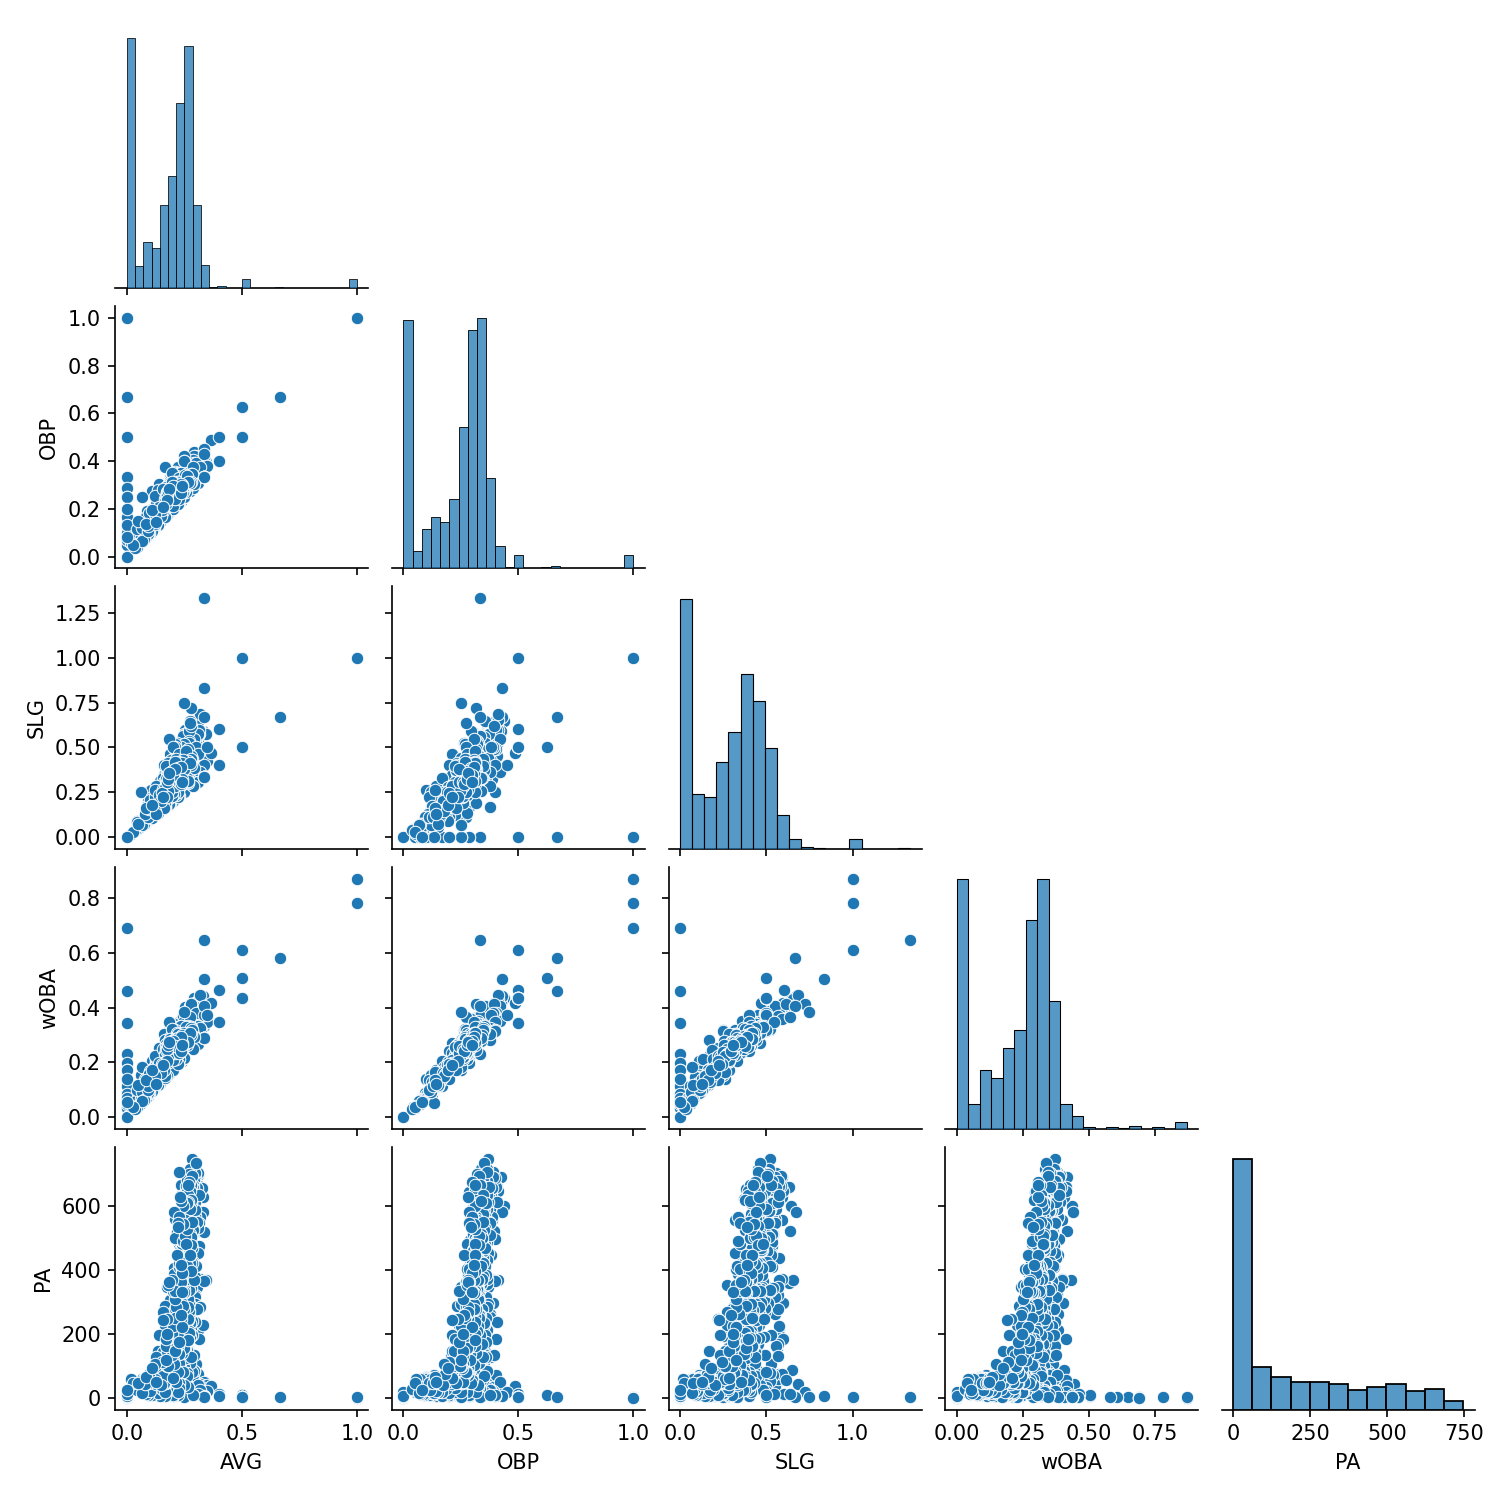

In [3]:
# pairplot to show distribution of each variable against one another
sns.pairplot(all_2019, 
             x_vars=['AVG','OBP','SLG','wOBA','PA'], 
             y_vars=['AVG','OBP','SLG','wOBA','PA'], 
             corner=True, 
             height=2)

## Look Only at Players with 100+ PA

In [4]:
over_100_PA_2019 = all_2019[all_2019['PA'] >= 100]
over_100_PA_2019.describe()

,G,AB,PA,AVG,OBP,SLG,wOBA
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,103.898004,343.277162,384.274945,0.250299,0.321202,0.429253,0.317308
std,36.891050,156.398582,176.229408,0.036882,0.039665,0.085455,0.044183
min,27.000000,86.000000,101.000000,0.124000,0.178000,0.144000,0.150000
25%,75.000000,207.000000,236.500000,0.228000,0.298500,0.374000,0.291000
50%,106.000000,329.000000,369.000000,0.253000,0.322000,0.425000,0.318000
75%,136.000000,481.500000,532.000000,0.275000,0.346000,0.488000,0.346000
max,162.000000,681.000000,747.000000,0.344000,0.438000,0.671000,0.442000


<IPython.core.display.Javascript object>


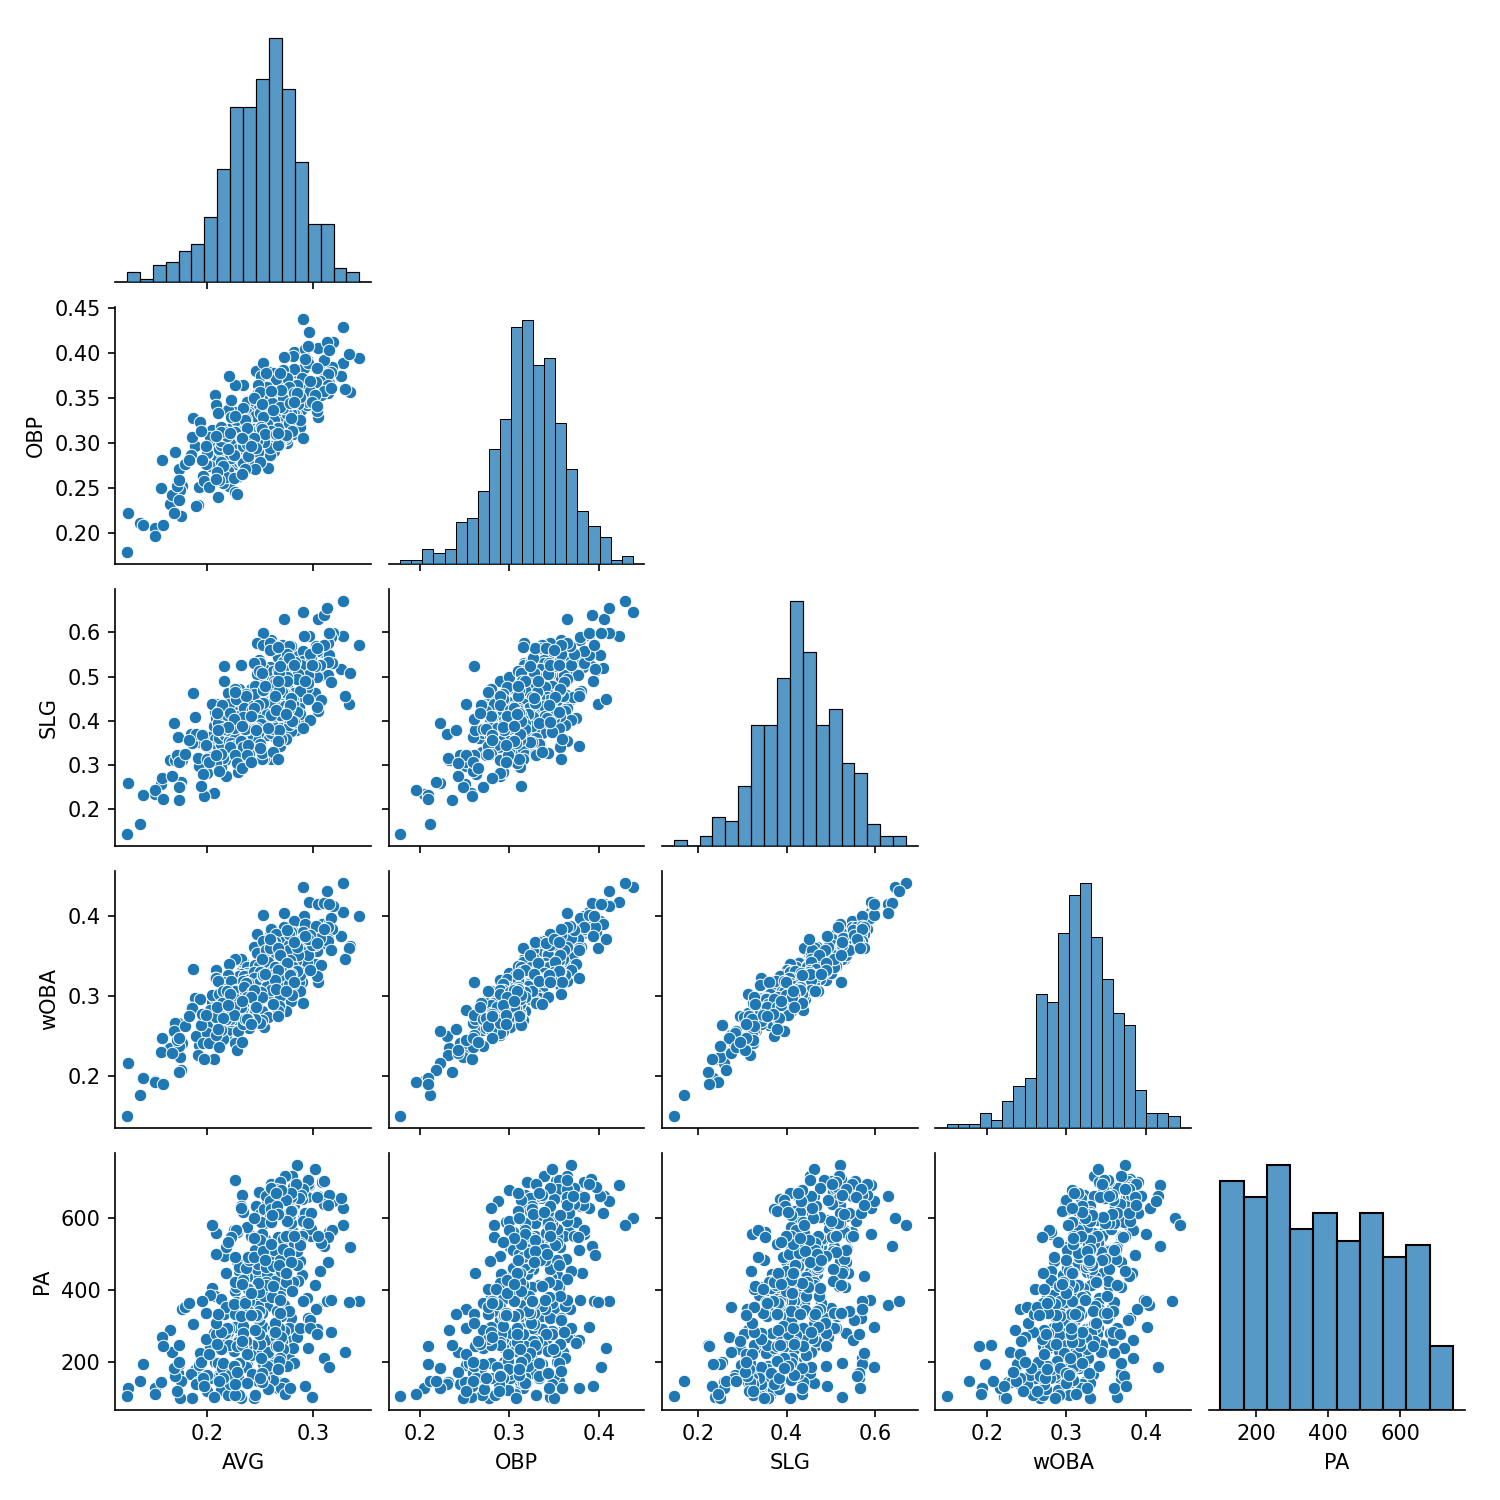

In [5]:
sns.pairplot(over_100_PA_2019, 
             x_vars=['AVG','OBP','SLG','wOBA','PA'], 
             y_vars=['AVG','OBP','SLG','wOBA','PA'], 
             corner=True, 
             height=2)

## Do PCA
Perform PCA while preserving the variance in the variables (do not standardize the variables first).

In [6]:
# my Windows machine has issues when automatically running all cells at once
# I get the error: LinAlgError: SVD did not converge
# simply rerunning the cell or running each cell individually fixes this. Windows, sigh.
pca = PCA()
arr = over_100_PA_2019[['AVG','OBP','SLG']].values
pca.fit(arr)
pca.explained_variance_ratio_

array([0.88441342, 0.08438219, 0.03120439])

In [7]:
PC = pca.transform(over_100_PA_2019[['AVG','OBP','SLG']].values)
PC = pd.DataFrame(PC, columns=['PC1','PC2','PC3'])
PC['wOBA'] = over_100_PA_2019['wOBA']

## Show PCA Distribution with wOBA

<IPython.core.display.Javascript object>


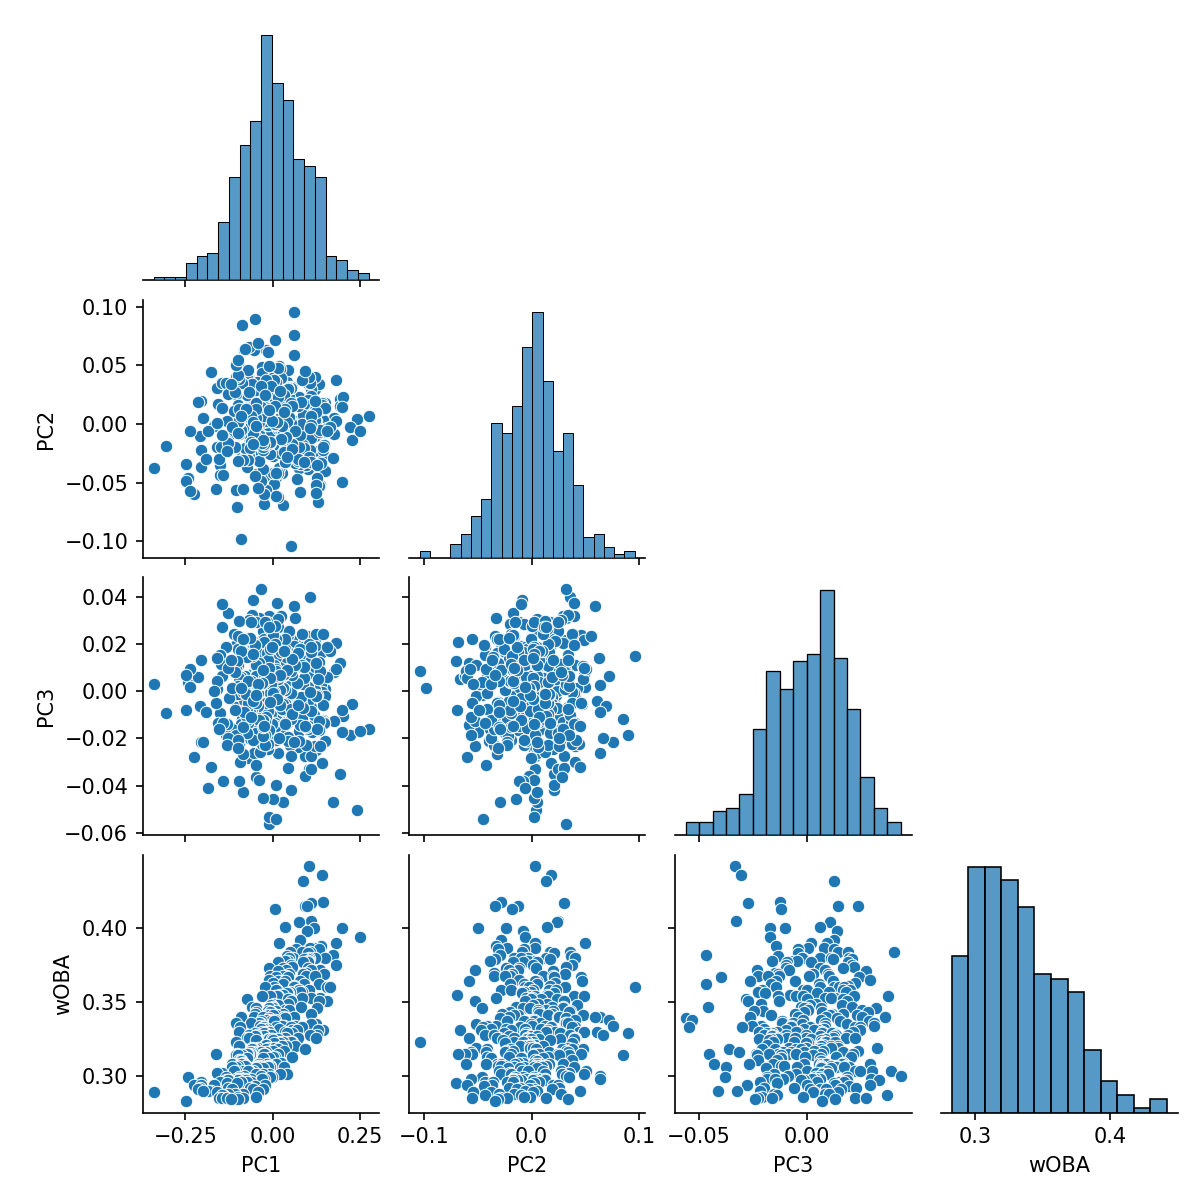

In [8]:
sns.pairplot(PC, 
             x_vars=['PC1','PC2','PC3','wOBA'], 
             y_vars=['PC1','PC2','PC3','wOBA'], 
             corner=True, 
             height=2)

## List PCA Components

In [9]:
pca.components_

array([[ 0.31657687,  0.33681555,  0.88675497],
       [ 0.55149384,  0.6952472 , -0.4609619 ],
       [ 0.77177304, -0.63496978, -0.03434748]])